In [1]:
# 필요한 라이브러리 설치
# !pip install numpy pandas matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 44.5 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [13]:
# 데이터의 결측치 및 이상치 확인
# 데이터에 결측치가 있는지 확인하고 처리하라.
# 데이터에 이상치가 있는지 확인하고 처리하라.
# 시각화를 통한 탐색
# 사용자별/영화별 평점 분포를 히스토그램, 박스 플롯 등으로 시각화하라. (Histogram)


# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_dir = '../kmrd/kmr_dataset/datafile/kmrd-small'
castings = pd.read_csv(os.path.join(data_dir, 'castings.csv'))
countries = pd.read_csv(os.path.join(data_dir, 'countries.csv'))
genres = pd.read_csv(os.path.join(data_dir, 'genres.csv'))
peoples = pd.read_csv(os.path.join(data_dir, 'peoples.txt'), sep='\t')
movies = pd.read_csv(os.path.join(data_dir, 'movies.txt'), sep='\t')
ratings = pd.read_csv(os.path.join(data_dir, 'rates.csv'))



In [20]:
# 데이터 결측치란 데이터 세트에서 관찰되지 않거나 기록되지 않은 값, 즉 비어 있는 값을 의미합니다.
print("=== 결측치 확인 ===")
print("\nRatings 데이터 결측치:")
print(ratings.isnull().sum()) # 결측치 없음






=== 결측치 확인 ===

Ratings 데이터 결측치:
user     0
movie    0
rate     0
time     0
dtype: int64


In [26]:
print("\nMovies 데이터 결측치:")
print(movies.isnull().sum())

# 2. movies 데이터셋의 결측치 처리

# title_eng가 결측인 경우는 한글 제목을 그대로 사용
movies['title_eng'] = movies['title_eng'].fillna(movies['title'])

# title과 title_eng가 모두 결측인 행 확인
missing_titles = movies[(movies['title'].isnull()) & (movies['title_eng'].isnull())]
if not missing_titles.empty:
    # 두 제목이 모두 없는 행은 삭제
    movies = movies.dropna(subset=['title', 'title_eng'], how='all')
    print(f"\n제목이 모두 없는 {len(missing_titles)}개 행이 삭제되었습니다.")

# year가 결측인 경우는 평균값으로 대체 (평균값 대치)
movies['year'] = movies['year'].fillna(movies['year'].mean().round())

# grade가 결측인 경우는 가장 빈도가 높은 값으로 대체 (최빈값 대치)
movies['grade'] = movies['grade'].fillna(movies['grade'].mode()[0])

print("\n=== 결측치 처리 후 확인 ===")
print("\nMovies 데이터 결측치:")
print(movies.isnull().sum())


Movies 데이터 결측치:
movie        0
title        7
title_eng    7
year         0
grade        0
dtype: int64

제목이 모두 없는 7개 행이 삭제되었습니다.

=== 결측치 처리 후 확인 ===

Movies 데이터 결측치:
movie        0
title        0
title_eng    0
year         0
grade        0
dtype: int64


In [28]:

print("\nCastings 데이터 결측치:")
print(castings.isnull().sum()) # 결측치 없음

print("\nCountries 데이터 결측치:")
print(countries.isnull().sum()) # 결측치 없음

print("\nGenres 데이터 결측치:")
print(genres.isnull().sum()) # 결측치 없음





Castings 데이터 결측치:
movie      0
people     0
order      0
leading    0
dtype: int64

Countries 데이터 결측치:
movie      0
country    0
dtype: int64

Genres 데이터 결측치:
movie    0
genre    0
dtype: int64


In [31]:
print("\nPeoples 데이터 결측치:")
print(peoples.isnull().sum())

# peoples 데이터의 korean과 original 컬럼의 결측치 처리
# korean이 결측이고 original이 있는 경우, original 값을 그대로 사용
peoples['korean'] = peoples['korean'].fillna(peoples['original'])

# original이 결측이고 korean이 있는 경우, korean 값을 그대로 사용
peoples['original'] = peoples['original'].fillna(peoples['korean'])

# korean과 original이 모두 결측인 행 확인
missing_names = peoples[(peoples['korean'].isnull()) & (peoples['original'].isnull())]
if not missing_names.empty:
    # 두 이름이 모두 없는 행은 삭제
    peoples = peoples.dropna(subset=['korean', 'original'], how='all')
    print(f"\n이름이 모두 없는 {len(missing_names)}개 행이 삭제되었습니다.")

print("\n=== 결측치 처리 후 확인 ===")
print("\nPeoples 데이터 결측치:")
print(peoples.isnull().sum())




Peoples 데이터 결측치:
people        0
korean        0
original    867
dtype: int64

=== 결측치 처리 후 확인 ===

Peoples 데이터 결측치:
people      0
korean      0
original    0
dtype: int64


In [57]:
# 이상치 제거 - Z-score


df = ratings

def eliminate_outliers_zscore(df, column, threshold=3):
  mean = df[column].mean()
  std = df[column].std()
  df['z_score'] = (df[column] - mean) / std
  result = df[df['z_score'].abs() < threshold]
  return result

res_zscore = eliminate_outliers_zscore(df, "rate")
print(res_zscore)


         user  movie  rate                time   z_score
0           0  10003     7 2017-05-07 03:34:00 -0.927452
1           0  10004     7 2016-07-03 07:10:00 -0.927452
2           0  10018     9 2017-12-15 13:22:00  0.022194
3           0  10021     9 2015-02-21 05:53:00  0.022194
4           0  10022     7 2015-03-29 11:09:00 -0.927452
...       ...    ...   ...                 ...       ...
140705  52023  10998    10 2015-01-19 15:01:00  0.497017
140706  52024  10998    10 2008-03-04 09:21:00  0.497017
140707  52025  10998     7 2017-06-27 07:02:00 -0.927452
140708  52026  10998     9 2015-06-12 06:27:00  0.022194
140709  52027  10998    10 2008-11-18 19:36:00  0.497017

[134740 rows x 5 columns]


In [56]:
df_movies = movies
df_rates = ratings

def print_movie_by_id(ids: list):
    for id in ids:
        print(df_movies[df_movies['movie'] == id])


movie_counts = df_rates['movie'].value_counts()
movie_rates = df_rates.groupby('movie')['rate'].mean()
max_count = movie_counts.max()
max_rate = movie_rates.max()
# Most evaluated movie ID (movie with the highest number of ratings)
most_evaluated_movie = movie_counts[movie_counts == max_count].index.tolist()

# Highest average rating movie ID
highest_avg_rating_movie = movie_rates[movie_rates == max_rate].index.tolist()

print(f"--------- 가장 많은 평가를 받은 영화: {most_evaluated_movie} ---------")
print_movie_by_id(most_evaluated_movie)
print(f"\n\n\n--------- 가장 높은 평균 점수를 받은 영화: {highest_avg_rating_movie} ---------")
print_movie_by_id(highest_avg_rating_movie)

--------- 가장 많은 평가를 받은 영화: [10200] ---------
     movie         title                          title_eng    year    grade
199  10200  터미네이터 2:오리지널  Terminator 2: Judgment Day , 1991  2019.0  15세 관람가



--------- 가장 높은 평균 점수를 받은 영화: [10180, 10384, 10510, 10518, 10799, 10895, 10937, 10974] ---------
     movie         title            title_eng    year     grade
179  10180  대통령을 만드는 사람들  Favorite Son , 1988  1988.0  청소년 관람불가
     movie title           title_eng    year grade
383  10384    여로  The Journey , 1959  1959.0    NR
     movie title    title_eng    year   grade
509  10510  성춘향전  成春香傳 , 1976  1976.0  전체 관람가
     movie title  title_eng    year     grade
517  10518    비황  秘煌 , 1992  1992.0  청소년 관람불가
     movie    title      title_eng    year   grade
798  10799  내 친구 제제  내친구 제제 , 1989  1989.0  전체 관람가
     movie   title         title_eng    year     grade
894  10895  피부 깊숙이  Skin Deep , 1989  1989.0  청소년 관람불가
     movie   title title_eng    year     grade
936  10937  위기의 여자      1987

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

그런 영화 없습니다. 전체 영화 통계를 보여드릴게요.


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

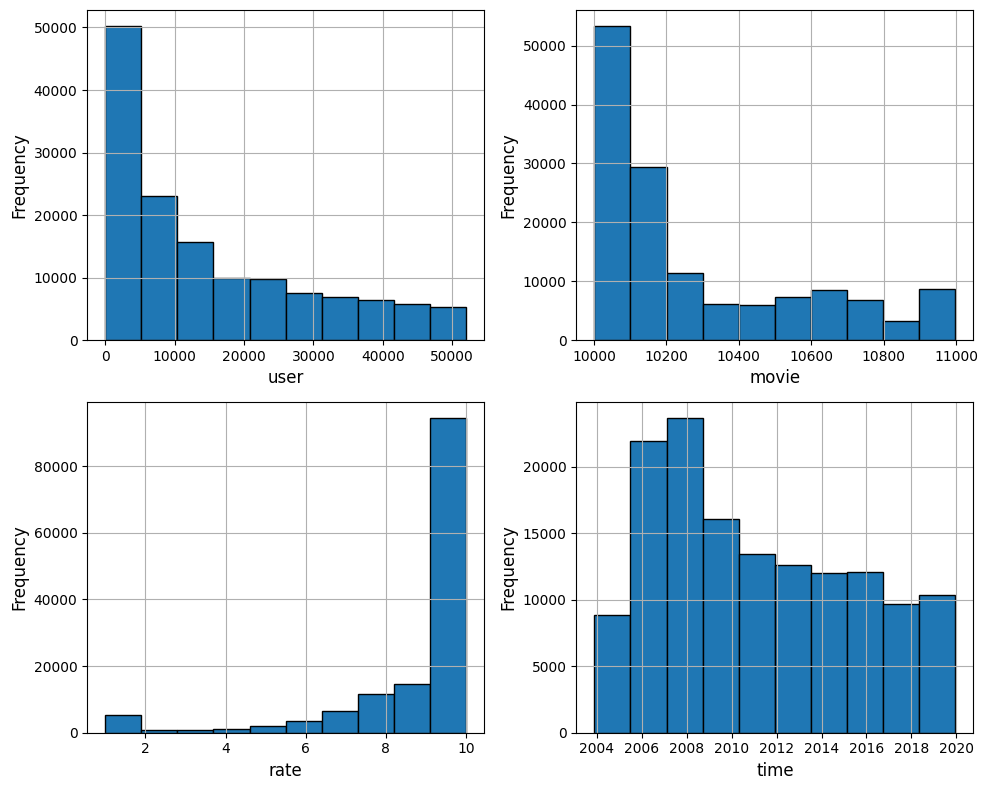

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

그런 영화 없습니다. 전체 영화 통계를 보여드릴게요.


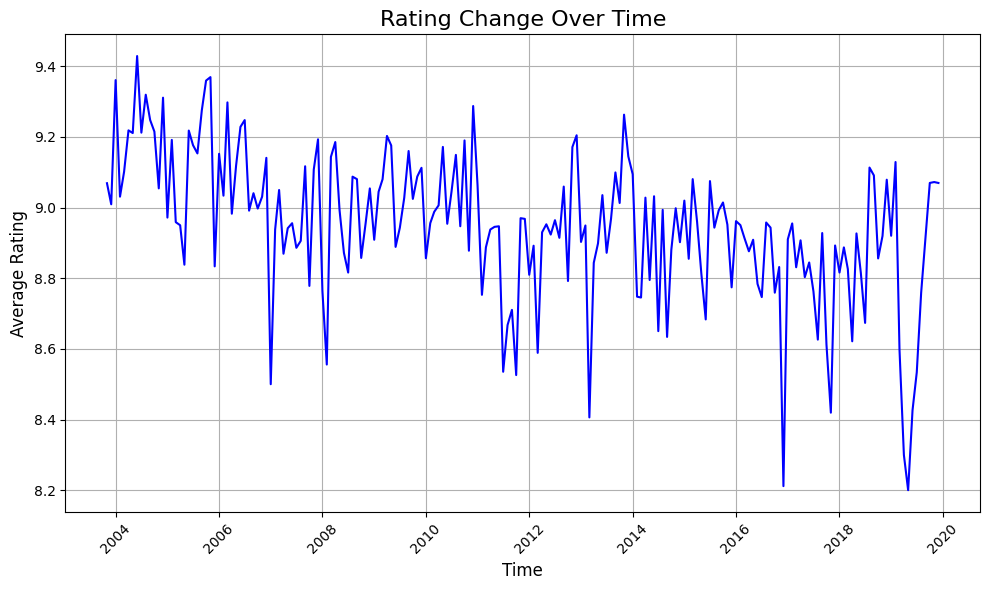

In [52]:
df_movies = movies
df_rates = ratings

def get_movie_id_by_name(name: str):
    try:
        result = df_movies[df_movies["title"] == name].reset_index(drop=True)
        if not result.empty:
            return result.loc[0, 'movie']
        else:
            return None
    except:
        return None

def get_boxplot_by_moviename(name:str):
    movie_id = get_movie_id_by_name(name)
    if movie_id:
        df = df_rates[df_rates["movie"] == movie_id]
    else:
        print("그런 영화 없습니다. 전체 영화 통계를 보여드릴게요.")
        df = df_rates
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    column = df.columns
    for i in range(2):
        for j in range(2):
            axes[i, j].hist(df[column[i * 2 + j]], bins=10, edgecolor='black')
            axes[i, j].set_xlabel(column[i * 2 + j], fontsize=12)
            axes[i, j].set_ylabel('Frequency', fontsize=12)
            axes[i, j].grid(True)

    plt.tight_layout()
    plt.show()

def get_plot_by_moviename_timebased(name: str):
    movie_id = get_movie_id_by_name(name)
    if movie_id:
        print(movie_id)
        df = df_rates[df_rates["movie"] == movie_id]
    else:
        print("그런 영화 없습니다. 전체 영화 통계를 보여드릴게요.")
        df = df_rates
    df['time'] = pd.to_datetime(df['time'], unit='s')
    monthly_avg_rating = df.groupby(df['time'].dt.to_period('M'))['rate'].mean()
    # Plot time-based ratings change
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_avg_rating.index.to_timestamp(), monthly_avg_rating.values, marker='', linestyle='-', color='b')
    plt.title('Rating Change Over Time', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Average Rating', fontsize=12)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

title = input("영화 제목을 입력해주세요")
get_boxplot_by_moviename(title)
get_plot_by_moviename_timebased(title)